In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mssa import MSSA
import pandas as pd
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
np.random.seed(13)

In [3]:
gaussian = lambda x : np.exp(-0.5 * x**2)
rectangular = lambda x : 1 * (x < 1 + 1e-6)
epanechnikov = lambda x : np.maximum(1 - x**2, 0)
epanechnikov_like = lambda x : (1 - 0.5 * x**2) * (x <=1 )

In [4]:
# Create a multiclass dataset
data = pd.read_table('data/yeast.txt', sep=',', header=None, index_col=0)
data = data.sample(frac=1)

X = data.iloc[:, :-1]
X = np.array(X)
X = scale(X)

y = data.iloc[:, -1]
y = np.array(y)

sample_size = X.shape[0]
# Define the number of classes
classes = np.unique(y)
n_classes = classes.shape[0]

print('Features shape:', X.shape)
print('Labels shape:', y.shape, ',', n_classes, 'different classes')

Features shape: (1484, 8)
Labels shape: (1484,) , 10 different classes


In [5]:
n_neighbors = np.array([5 * 1.25**i for i in range(8)]).astype(int)

In [6]:
mssa = MSSA(n_neighbors=n_neighbors)

#for delta in np.arange(0.7, 0.96, 0.05):
for delta in [0.8]:

    # tune critical values
    z = mssa.tune_critical_values(X[1:, :], X[0,:].reshape(-1), n_classes, confidence=delta)
    #print(z)

    #for c in np.arange(0.3, 0.7, 0.1):
    #for c in np.arange(0.8, 1.5, 0.1):
    for c in [1.3]:
        mssa_err = 0
        knn_err = np.zeros(n_neighbors.shape)
        for i in range(sample_size):

            x_test = X[i, :].reshape(-1)
            y_test = y[i]
            X_train = np.delete(X, i, axis=0)
            y_train = np.delete(y, i)

            y_mssa, y_knn = mssa.predict(X_train, y_train, x_test, c * z)

            mssa_err += 1./sample_size * (y_test != y_mssa)
            knn_err += 1./sample_size * (y_test != y_knn)

        print('delta = ', delta, ', c = ', c, ', err = ', mssa_err)
print(np.min(knn_err))

delta =  0.8 , c =  1.3 , err =  0.3955525606468987
0.397574123989


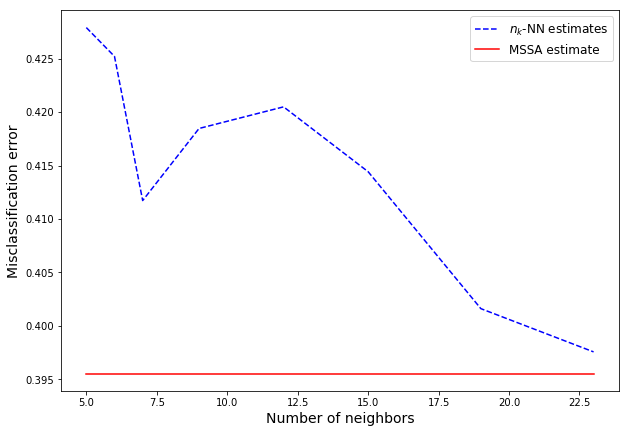

In [7]:
plt.figure(figsize=(10,7))
plt.plot(n_neighbors, knn_err, 'b--', label='$n_k$-NN estimates')
plt.plot(n_neighbors, mssa_err * np.ones(n_neighbors.shape[0]), 'r-', label='MSSA estimate')
#plt.plot(np.arange(n_neighbors.shape[0]), knn_err, 'b--', label='$n_k$-NN estimates')
#plt.plot(np.arange(n_neighbors.shape[0]), mssa_err * np.ones(n_neighbors.shape[0]), 'r-', label='MSSA estimate')
plt.ylabel('Misclassification error', fontsize=14)
plt.xlabel('Number of neighbors', fontsize=14)
#plt.xlabel('Index of the weighted nearest neighbor estimate', fontsize=14)
plt.legend(loc=0, fontsize=12)
plt.show()